In [2]:
import numpy as np
import os
import ants
from matplotlib import pyplot as plt
import os
import re

from tqdm import tqdm

/mmfs1/data/liacz/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/usr/public/anaconda/2020.07-p3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/public/anaconda/2020.07-p3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [7]:
#ds1747-S92, HCPaging-S725, HCPdev-S571, Ping-S750, Hernandez-S361
fn = 'Hernandez-S361'
indir = os.path.join(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/aligned_brains'), fn)
# indir = os.path.join(os.path.expanduser('~/Documents/Bilingualism_CVAE/data/extracted_brains'), fn)

subs = [sub.replace("_aligned.nii", "") for sub in os.listdir(indir)]
# subs = [sub.replace(".nii", "") for sub in os.listdir(indir) if sub.endswith('.nii')]

n = len(subs)

outdir = os.path.expanduser(f'~/Documents/Bilingualism_CVAE/data/array_brains')
# outdir = os.path.expanduser(f'~/Documents/Bilingualism_CVAE/data/array_brains/unaligned')

#os.mkdir(os.path.join(outdir,fn)) #if need save tinny brain

In [8]:
n

361

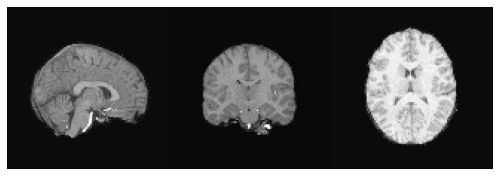

In [9]:
# brain_exp = ants.image_read(os.path.join(indir, '{sub}_aligned.nii'.format(sub=subs[0]))) # Load in a template brain
# brain_exp.plot_ortho(flat=True,xyz_lines=False,orient_labels=False,figsize=1.0)

In [9]:
def brain_tinny_array(indir,sub,outdir,do_plot=False):
    brain = ants.image_read(os.path.join(indir, '{sub}_aligned.nii'.format(sub=sub)))
#     brain = ants.image_read(os.path.join(indir, '{sub}.nii'.format(sub=sub)))

    brain_tiny = brain.resample_image(resample_params=(64,64,64), use_voxels=True, interp_type=4) # Make sure all brains are same size
    
    if do_plot:
        brain_tiny.plot_ortho(flat=True,xyz_lines=False,orient_labels=False,figsize=5.0)

    #brain_tiny.to_filename(os.path.join(outdir,sub+'_brain_tiny.nii')) # Save tinny brain
    
    outArr = brain_tiny.numpy()
    outArr = (outArr - np.min(outArr)) / (np.max(outArr) - np.min(outArr))
    
    return outArr
    

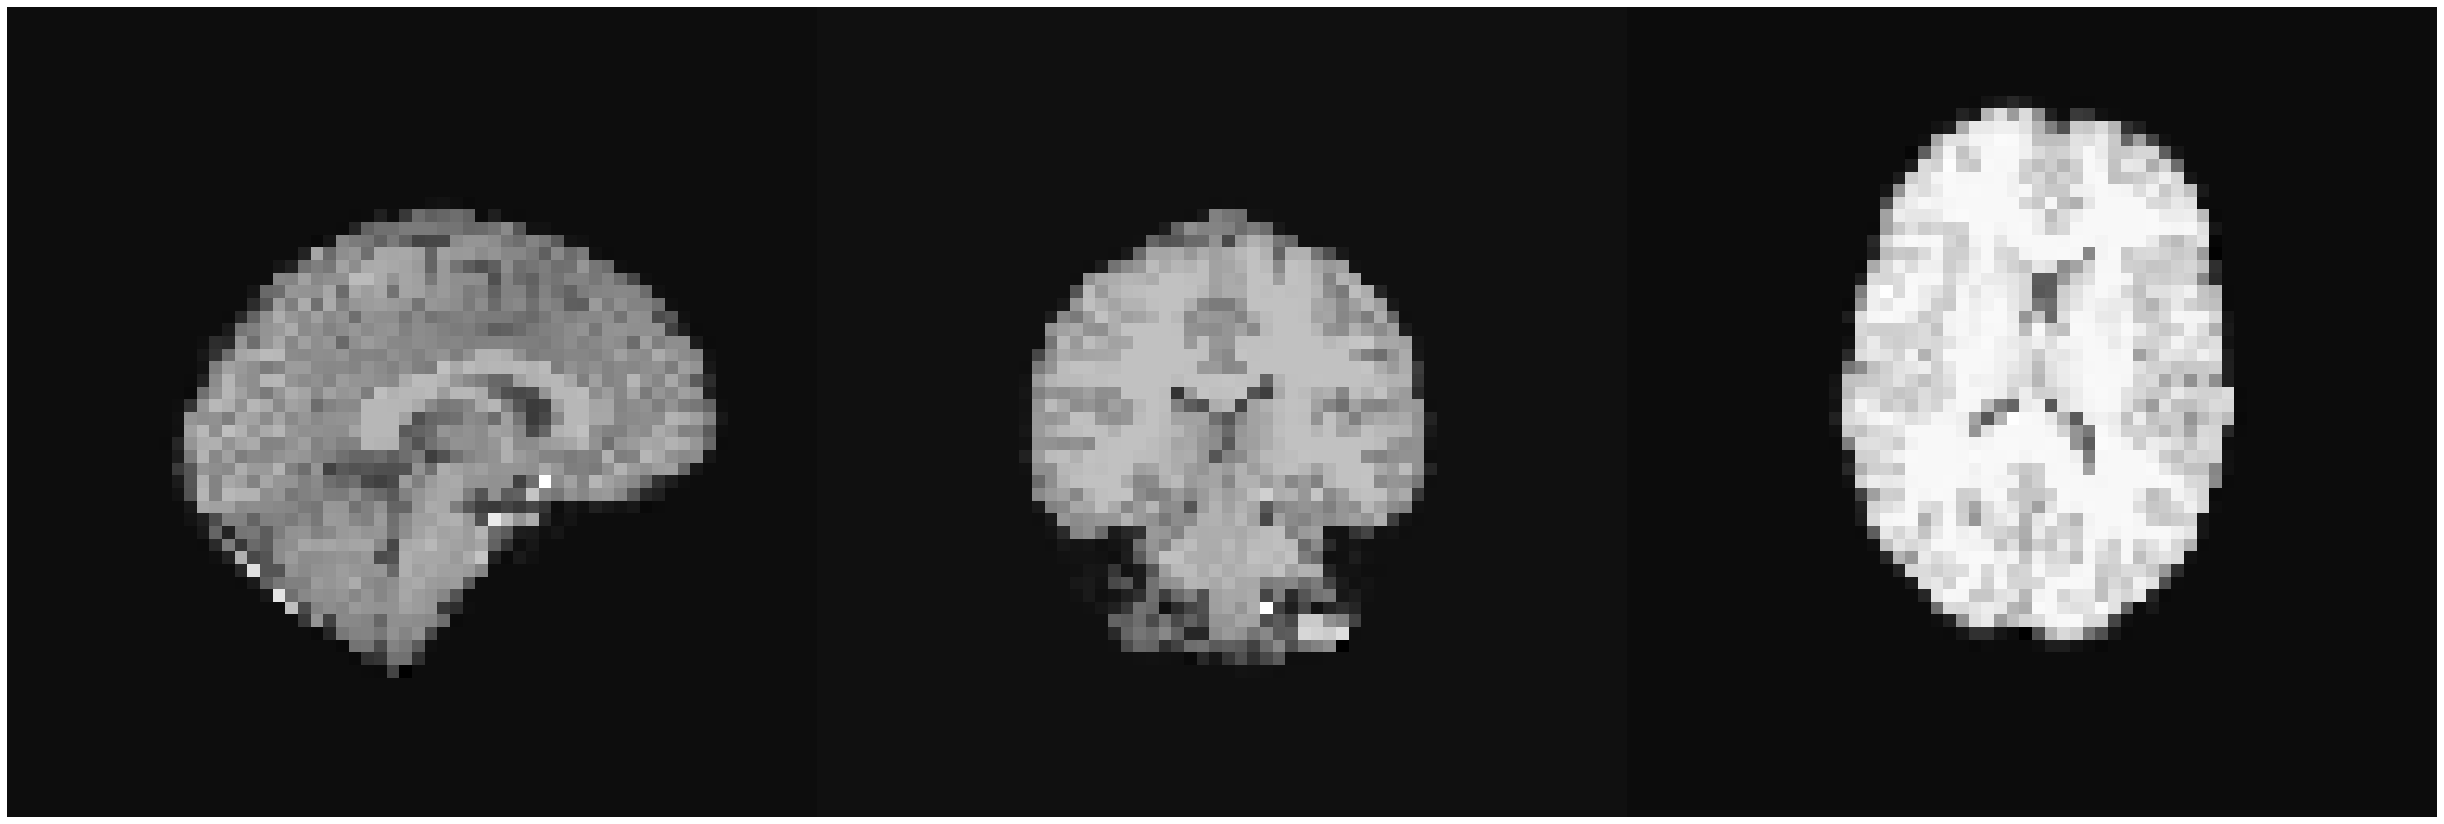

array([[[0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726],
        [0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726],
        [0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726],
        ...,
        [0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726],
        [0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726],
        [0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726]],

       [[0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726],
        [0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726],
        [0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726],
        ...,
        [0.07599726, 0.07599726, 0.07599726, ..., 0.07599726,
         0.07599726, 0.07599726],
        [0.0

In [10]:
brain_tinny_array(indir,subs[80],outdir,True)

In [11]:
brain_arr = [brain_tinny_array(indir,sub,outdir) for sub in tqdm(subs)]
brain_arr = np.array(brain_arr)
ds = re.split('[-]',fn)[0]
arr_ofn = os.path.expanduser(f'~/Documents/Bilingualism_CVAE/data/array_brains/Anat-Bilingual-64iso-{ds}-S{n}.npz')
arr_ofn
np.savez_compressed(arr_ofn,data=brain_arr,subs=subs, ds=ds)

100%|██████████| 361/361 [09:39<00:00,  1.61s/it]
